import the dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
house_price_dataset=pd.read_csv(r"boston.csv")

In [7]:
hpd=pd.DataFrame(house_price_dataset)

In [8]:
hpd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [9]:
hpd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
hpd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
correlation_matrix=hpd.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


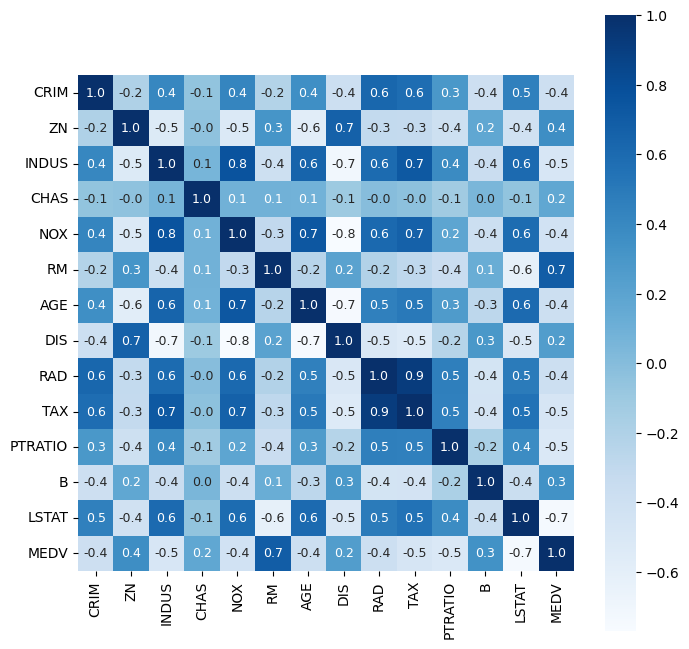

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues')
plt.show()

In [13]:
#distribute the values
X=hpd.drop(columns=['MEDV','CHAS','DIS'])
y=hpd['MEDV']

In [40]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,273.0,21.0,393.45,6.48


In [14]:
X_train ,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 11) (102, 11) (404,) (102,)


In [16]:
from xgboost import XGBRegressor

In [17]:
model=XGBRegressor()

In [18]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [19]:
train_data_prediction=model.predict(X_train)

In [20]:
train_data_prediction

array([11.996291 , 19.8968   , 19.40378  , 13.402353 , 18.16972  ,
       24.598543 , 21.09314  , 24.68712  ,  8.695488 , 27.488422 ,
       20.699863 , 36.167652 , 31.591969 , 11.705339 , 39.809395 ,
       13.9130945, 21.793377 , 23.691404 , 17.590973 , 24.379053 ,
        8.784955 , 19.181591 , 25.302958 , 20.405489 , 23.095757 ,
       37.89467  , 15.605192 , 45.405487 , 15.7005   , 22.603987 ,
       14.541005 , 18.694658 , 17.768019 , 16.114845 , 20.600811 ,
       31.59796  , 29.086538 , 15.599658 , 17.532942 , 22.497484 ,
       19.40535  , 19.303865 ,  8.500347 , 20.602198 , 16.987677 ,
       17.089943 , 14.474703 , 49.994297 , 14.2939825, 12.603292 ,
       28.668262 , 21.190048 , 19.30637  , 23.097328 , 19.091425 ,
       25.004023 , 33.42238  ,  5.006098 , 29.59956  , 18.687365 ,
       21.691961 , 23.11533  , 22.801052 , 20.963411 , 48.805634 ,
       14.617595 , 16.605537 , 27.087557 , 20.09979  , 19.78888  ,
       21.00653  , 41.27779  , 23.162853 , 20.369493 , 18.5565

In [21]:
from sklearn import metrics

In [22]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
# r squred error
score_1=metrics.r2_score(y_train,train_data_prediction)
print("R.2 value=",score_1)
# Mean absolute Error
score_2=metrics.mean_absolute_error(y_train,train_data_prediction)
print('MAE=',score_2)

R.2 value= 0.9999962556959784
MAE= 0.012680952619798149


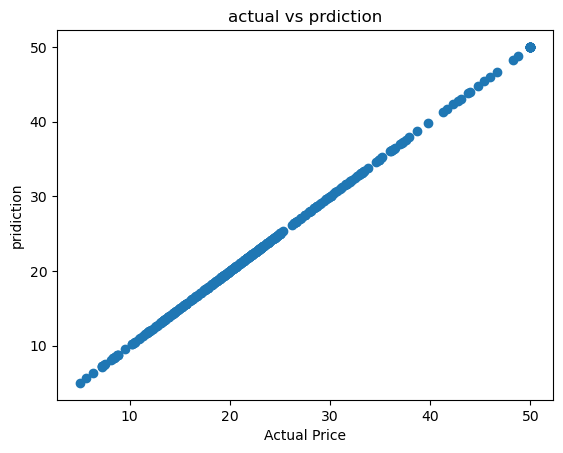

In [24]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('pridiction')
plt.title('actual vs prdiction')
plt.show()

In [25]:
#Prediction for Test data

test_data_prediction=model.predict(X_test)


In [26]:
test_data_prediction

array([24.156132 , 31.928286 , 18.40292  , 22.280785 , 18.16466  ,
       20.824419 , 18.582369 , 17.320124 , 21.620539 , 21.58662  ,
       21.301931 , 20.028511 , 10.609076 , 21.144989 , 18.914728 ,
       26.209467 , 20.567446 , 10.010806 , 46.422333 , 14.716878 ,
       24.566216 , 25.883245 , 14.443782 , 22.644218 , 16.16766  ,
       15.134049 , 22.495367 , 13.251555 , 18.945688 , 22.013657 ,
       19.178223 , 23.743551 , 16.642141 , 20.133442 , 14.976082 ,
       15.761204 , 35.50751  , 18.175667 , 23.107546 , 23.949747 ,
       21.01605  , 30.098984 , 46.196156 , 17.7722   , 22.058765 ,
       14.705117 , 15.097728 , 24.448093 , 18.202541 , 26.351965 ,
       22.11602  , 35.73213  , 17.608574 , 27.126234 , 44.920326 ,
       21.557262 , 15.215116 , 31.844875 , 22.016848 , 20.142286 ,
       27.901148 , 34.81229  , 28.794937 , 17.972742 , 26.722067 ,
       14.893471 , 13.445382 , 23.016762 , 27.787392 , 15.6219015,
       20.312954 , 30.315527 ,  9.924973 , 20.959866 , 20.9845

In [27]:
score_1=metrics.r2_score(y_test,test_data_prediction)
print("R.2 value=",score_1)
# Mean absolute Error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)
print('MAE=',score_2)

R.2 value= 0.9151363880059992
MAE= 1.910952658746757


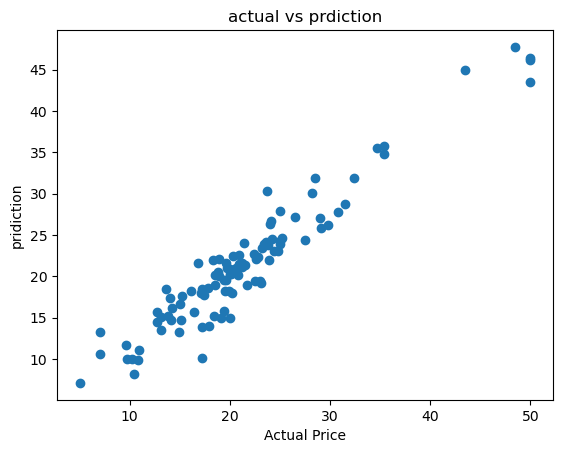

In [28]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('pridiction')
plt.title('actual vs prdiction')
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [30]:
model_2=RandomForestRegressor()

In [31]:
pipeline=Pipeline(steps=[
    
    ('Xgbregerssor',model_2)
    
])

In [32]:
pipeline.fit(X_train,y_train)

,steps,"[('Xgbregerssor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [33]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.510,6.416,84.1,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,0.447,6.758,32.9,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.609,5.983,98.8,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.413,6.065,7.8,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.713,6.297,91.8,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.597,4.628,100.0,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.740,6.461,93.3,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.597,6.657,100.0,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.449,6.015,45.1,3,247.0,18.5,395.99,12.86


In [34]:
pipeline.fit(X_train,y_train)
X_test['LSTAT']=y_test
X_test['Prediction'] = pipeline.predict(X_test)
X_test['Actual_Error'] = X_test['LSTAT'] - X_test['Prediction']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['LSTAT']
ran=X_test['Absolute_Percentage_Error'].mean()
ran

0.40761020420245897

In [35]:
import pickle
with open("Boston House Price Prediction.pkl","wb") as file:
    pickle.dump(pipeline,file)

In [38]:
with open(r"R:\DATA SCIENCE\Dharmarajan\Project_1_Boston House Price Prediction\Boston House Price Prediction.pkl","rb") as f:
    pipeline=pickle.load(f)

